# Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("movies_FINAL.csv")
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,...,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budget_filled,gross_filled
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,English,USA,PG-13,2009.0,936.0,7.9,1.78,33000,237000000.0,7.605058e+08
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,English,USA,PG-13,2007.0,5000.0,7.1,2.35,0,300000000.0,3.094042e+08
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,English,UK,PG-13,2015.0,393.0,6.8,2.35,85000,245000000.0,2.000742e+08
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,English,USA,PG-13,2012.0,23000.0,8.5,2.35,164000,250000000.0,4.481306e+08
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,245000000.0,2.068224e+09


##Limpieza de datos


In [ ]:
print("Primeras filas:")
print(df.head())
print("\nColumnas del dataset:")
print(df.columns)


Primeras filas:
       director_name  num_critic_for_reviews  duration  \
0      James Cameron                   723.0     178.0   
1     Gore Verbinski                   302.0     169.0   
2         Sam Mendes                   602.0     148.0   
3  Christopher Nolan                   813.0     164.0   
4        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes                           genres     actor_1_name  \
0                  1000.0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1                 40000.0         Action|Adv

In [ ]:
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
director_name                 47
num_critic_for_reviews         7
duration                       6
director_facebook_likes       47
actor_3_facebook_likes        14
actor_2_name                   7
actor_1_facebook_likes         3
genres                         0
actor_1_name                   3
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  14
facenumber_in_poster           6
plot_keywords                 48
movie_imdb_link                0
num_user_for_reviews           2
language                       9
country                        1
content_rating               103
title_year                    49
actor_2_facebook_likes         7
imdb_score                     0
aspect_ratio                 122
movie_facebook_likes           0
budget_filled                  0
gross_filled                   0
dtype: int64


In [ ]:
df_clean = df.copy()

# Numéricas -> mediana o 0
df_clean['num_critic_for_reviews'] = df_clean['num_critic_for_reviews'].fillna(df_clean['num_critic_for_reviews'].median())
df_clean['duration'] = df_clean['duration'].fillna(df_clean['duration'].median())
df_clean['director_facebook_likes'] = df_clean['director_facebook_likes'].fillna(0)
df_clean['actor_1_facebook_likes'] = df_clean['actor_1_facebook_likes'].fillna(0)
df_clean['actor_2_facebook_likes'] = df_clean['actor_2_facebook_likes'].fillna(0)
df_clean['actor_3_facebook_likes'] = df_clean['actor_3_facebook_likes'].fillna(0)
df_clean['facenumber_in_poster'] = df_clean['facenumber_in_poster'].fillna(0)
df_clean['title_year'] = df_clean['title_year'].fillna(df_clean['title_year'].median())
df_clean['aspect_ratio'] = df_clean['aspect_ratio'].fillna(df_clean['aspect_ratio'].median())

# Categóricas -> "Unknown"
df_clean['director_name'] = df_clean['director_name'].fillna("Unknown")
df_clean['actor_1_name'] = df_clean['actor_1_name'].fillna("Unknown")
df_clean['actor_2_name'] = df_clean['actor_2_name'].fillna("Unknown")
df_clean['actor_3_name'] = df_clean['actor_3_name'].fillna("Unknown")
df_clean['plot_keywords'] = df_clean['plot_keywords'].fillna("Unknown")
df_clean['language'] = df_clean['language'].fillna("Unknown")
df_clean['country'] = df_clean['country'].fillna("Unknown")
df_clean['content_rating'] = df_clean['content_rating'].fillna("Unknown")

print("\nValores nulos después de limpieza:")
print(df_clean.isnull().sum())


Valores nulos después de limpieza:
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         2
language                     0
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
budget_filled                0
gross_filled                 0
dtype: int64


### Selección de variables


In [ ]:
y = df_clean['gross_filled']   # ingresos de taquilla

# X: factores que influyen
features = [
    'budget_filled',
    'duration',
    'num_critic_for_reviews',
    'num_user_for_reviews',
    'imdb_score',
    'director_facebook_likes',
    'cast_total_facebook_likes',
    'movie_facebook_likes',
    'language',
    'country',
    'content_rating',
    'genres'
]
X = df_clean[features]

In [ ]:
# One-hot encoding de categóricas
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)
y = y.fillna(0)

print("\nValores nulos en X después de limpieza:", X.isnull().sum().sum())
print("Valores nulos en y después de limpieza:", y.isnull().sum())

print("\nShape de X:", X.shape)
print("Shape de y:", y.shape)



Valores nulos en X después de limpieza: 0
Valores nulos en y después de limpieza: 0

Shape de X: (4364, 965)
Shape de y: (4364,)


### Dividir en Train / Test

In [ ]:
# 1Separar entrenamiento (70%) y temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# 2De temp (30%), separar validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Entrenamiento:", X_train.shape)
print("Validación:", X_val.shape)
print("Prueba:", X_test.shape)


Entrenamiento: (3054, 965)
Validación: (655, 965)
Prueba: (655, 965)


### Modelo de regresión lineal

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


### Evaluación del modelo

In [ ]:
print("\nIntercepto:", model.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Mostrar coeficientes ordenados
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("\nCoeficientes del modelo:")
print(coef_df.head(15))  # top 15 variables más influyentes



Intercepto: -120224197.83606292
R²: -10.28802922707764
RMSE: 221672523.9313806

Coeficientes del modelo:
                                              Variable   Coeficiente
100                                    country_Unknown  1.940355e+09
925                                     genres_Fantasy  8.379617e+08
419    genres_Adventure|Animation|Drama|Family|Musical  3.214727e+08
253  genres_Action|Biography|Drama|History|Thriller...  2.260097e+08
790         genres_Crime|Drama|Horror|Mystery|Thriller  2.178691e+08
507             genres_Adventure|Drama|Fantasy|Romance  2.108081e+08
21                                      language_Greek  1.988181e+08
215            genres_Action|Adventure|Fantasy|Romance  1.945855e+08
561       genres_Animation|Comedy|Family|Fantasy|Music  1.800952e+08
394  genres_Adventure|Animation|Comedy|Drama|Family...  1.791498e+08
584            genres_Animation|Family|Fantasy|Musical  1.702534e+08
858              genres_Drama|Fantasy|Romance|Thriller  1.687928e+

In [ ]:
# --- Interpretación de coeficientes ---
coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)

print("📊 Interpretación de los coeficientes del modelo:\n")
for i, row in coef.iterrows():
    var = row["Variable"]
    beta = row["Coeficiente"]

    if beta > 0:
        print(f"✔️ {var}: Un aumento de 1 unidad en {var} está asociado "
              f"con un incremento promedio de {beta:.2f} en los ingresos (manteniendo las demás constantes).")
    elif beta < 0:
        print(f"❌ {var}: Un aumento de 1 unidad en {var} está asociado "
              f"con una disminución promedio de {abs(beta):.2f} en los ingresos (manteniendo las demás constantes).")
    else:
        print(f"⚪ {var}: No tiene efecto lineal aparente en los ingresos.")


📊 Interpretación de los coeficientes del modelo:

✔️ country_Unknown: Un aumento de 1 unidad en country_Unknown está asociado con un incremento promedio de 1940354875.27 en los ingresos (manteniendo las demás constantes).
✔️ genres_Fantasy: Un aumento de 1 unidad en genres_Fantasy está asociado con un incremento promedio de 837961684.68 en los ingresos (manteniendo las demás constantes).
✔️ genres_Adventure|Animation|Drama|Family|Musical: Un aumento de 1 unidad en genres_Adventure|Animation|Drama|Family|Musical está asociado con un incremento promedio de 321472677.62 en los ingresos (manteniendo las demás constantes).
✔️ genres_Action|Biography|Drama|History|Thriller|War: Un aumento de 1 unidad en genres_Action|Biography|Drama|History|Thriller|War está asociado con un incremento promedio de 226009652.76 en los ingresos (manteniendo las demás constantes).
✔️ genres_Crime|Drama|Horror|Mystery|Thriller: Un aumento de 1 unidad en genres_Crime|Drama|Horror|Mystery|Thriller está asociado con

### Visualización

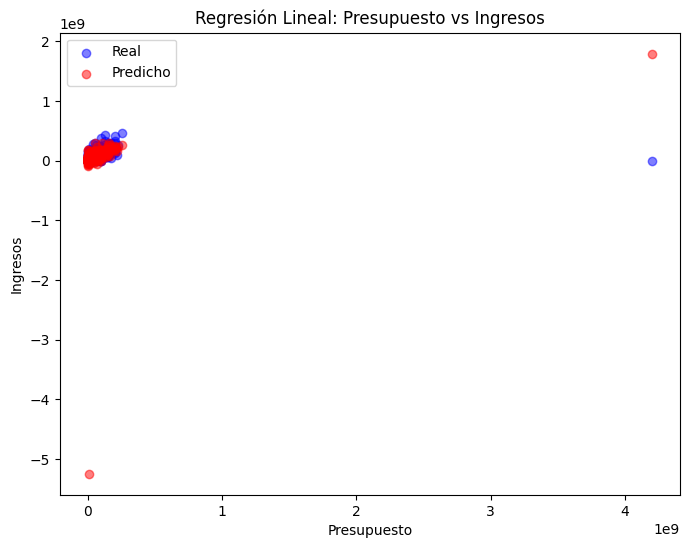

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_test['budget_filled'], y_test, color='blue', alpha=0.5, label="Real")
plt.scatter(X_test['budget_filled'], y_pred, color='red', alpha=0.5, label="Predicho")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.title("Regresión Lineal: Presupuesto vs Ingresos")
plt.legend()
plt.show()

### Matriz de correlación

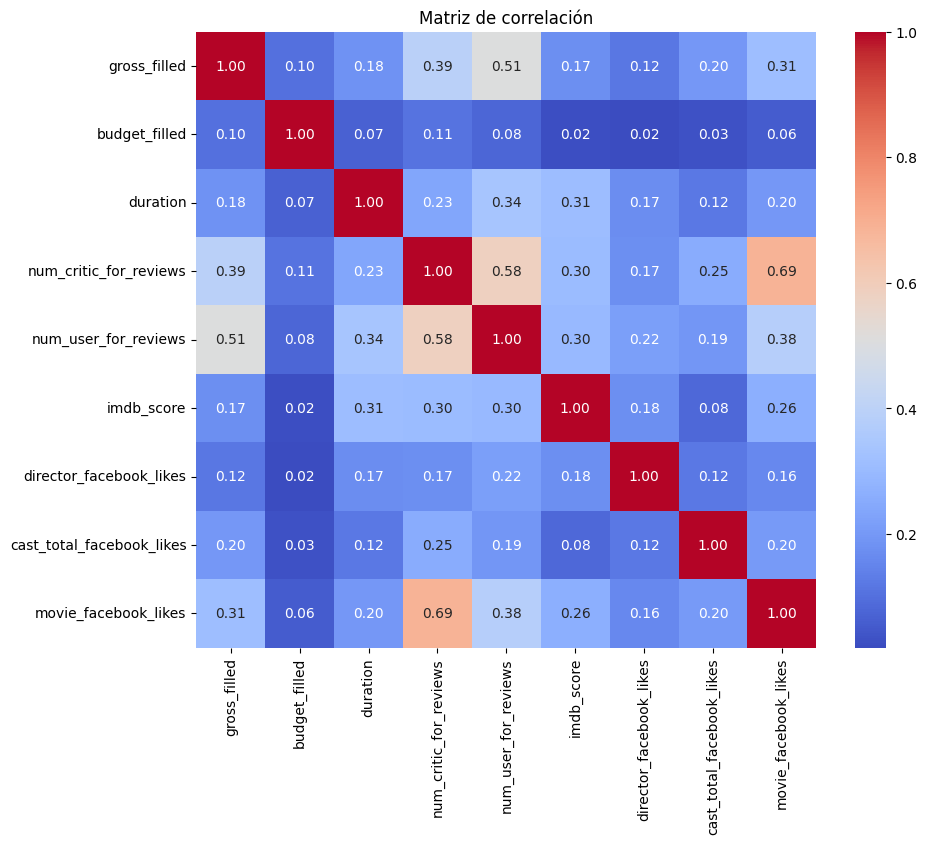

In [ ]:
plt.figure(figsize=(10,8))
corr = df_clean[['gross_filled','budget_filled','duration','num_critic_for_reviews',
                 'num_user_for_reviews','imdb_score','director_facebook_likes',
                 'cast_total_facebook_likes','movie_facebook_likes']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


### Importancia de coeficientes

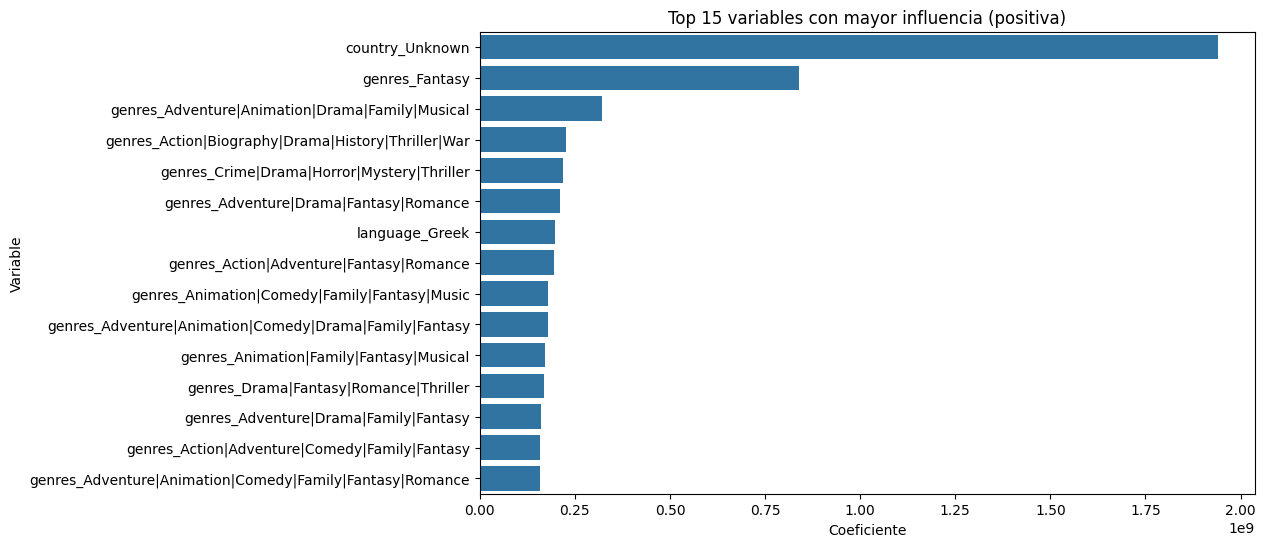

In [ ]:
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_df.head(15))
plt.title("Top 15 variables con mayor influencia (positiva)")
plt.show()


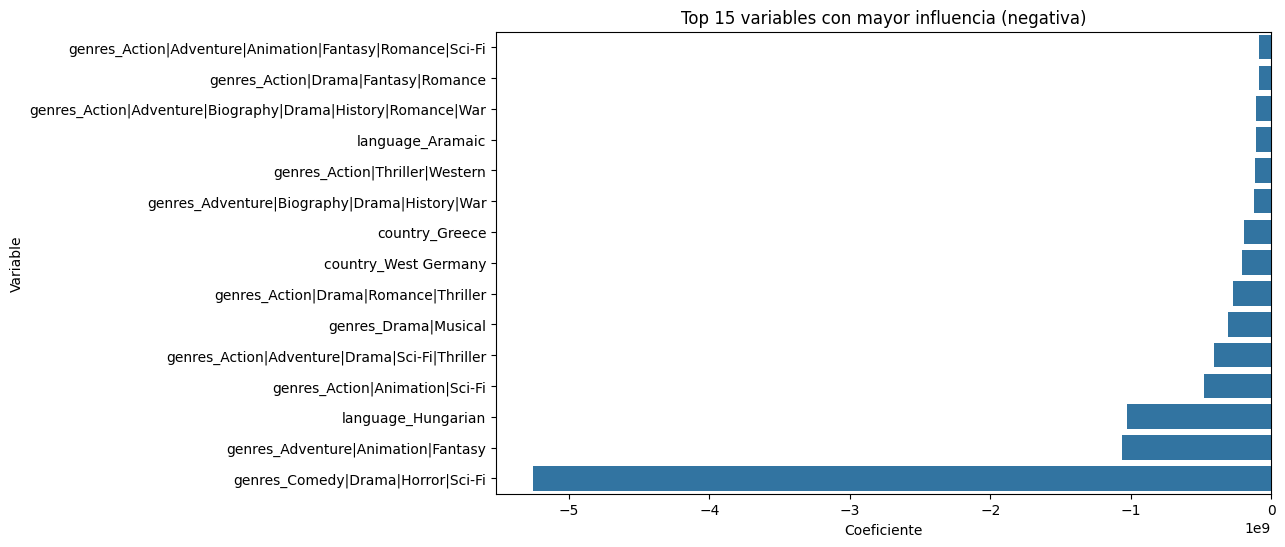

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_df.tail(15))
plt.title("Top 15 variables con mayor influencia (negativa)")
plt.show()


### Predicho vs Real

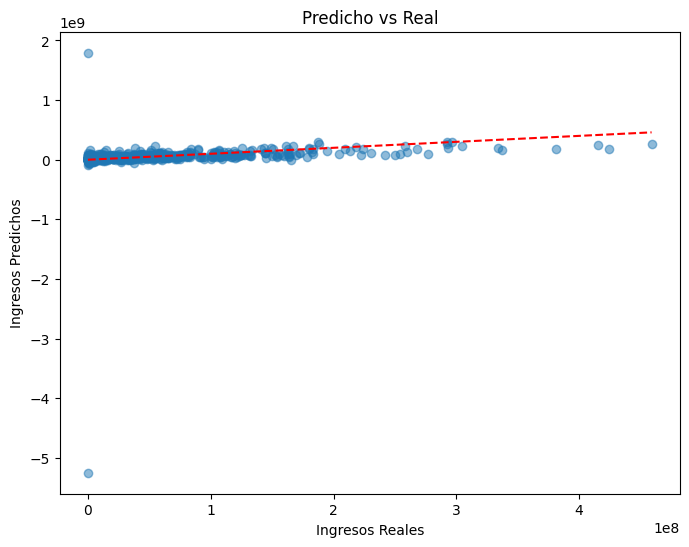

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Ingresos Reales")
plt.ylabel("Ingresos Predichos")
plt.title("Predicho vs Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### IMDb Score vs Ingresos

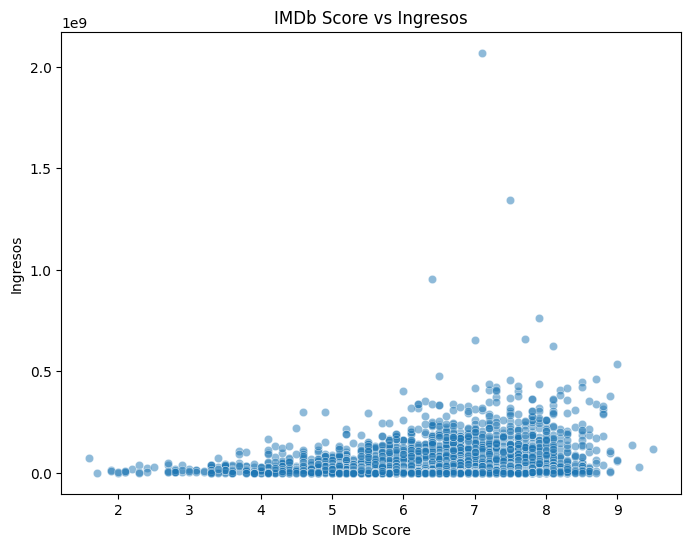

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="imdb_score", y="gross_filled", data=df_clean, alpha=0.5)
plt.title("IMDb Score vs Ingresos")
plt.xlabel("IMDb Score")
plt.ylabel("Ingresos")
plt.show()
